In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tobiasz Budzynski, an exercise for Machine Intelligence course.

# H8.2 K-means clustering - online

In [2]:
PATH = "cluster.dat"
DATA = np.loadtxt(PATH)

nr_samples = DATA.shape[1]
t_max = DATA.shape[1]
center = np.mean(DATA, axis=1)
std = np.std(DATA, axis=1)


# How many clusters are You expecting?
nr_prototypes = 4

# Choose a learning step
epsilon_0 = np.amax(std)

# Select diminishing factor for annealing
tau = 0.99 



In [3]:
# Initialization
prototype = np.random.normal(center, std, (4,2)).T

trajectories = [prototype.copy()]
error_hist = []
epsilon = epsilon_0

In [4]:
def error(data, prototype, t_max=DATA.shape[1], m=nr_prototypes):
    """
    Summary distance of data points to it's closest prototype.
    """
    w = prototype.T
    distance = np.linalg.norm(data.T[np.newaxis, :] - w[:, np.newaxis], axis=2)

    min = np.argmin(distance, axis=0)
    for i in range(m):
        w[i, :] = np.where(np.sum(i == min) > 0, np.mean(data[:, min == i], axis=1), w[i, :])

    return np.sum(distance[min, range(len(min))])/len(min)

In [5]:

# On-line K-means clustering

for t in range(t_max):

    # Annealing
    if t > t_max//4 + 1:
        epsilon = tau * epsilon

    # Choosing a true point and the closest prototype
    point_index = np.random.randint(nr_samples)
    x = DATA[:, point_index]
    norms_w = np.linalg.norm(x-prototype.T, axis=1)
    q = np.argmin(norms_w)

    # Move the prototype
    prototype[:, q] = prototype[:, q] + epsilon*(x-prototype[:, q])
    error_hist.append(error(DATA, prototype))

    trajectories.append(prototype.copy())


In [6]:

def distance(DATA, prototype):
    return np.linalg.norm(DATA.T[np.newaxis, :] - (prototype.T)[ :, np.newaxis], axis=2)

minimum = np.argmin(distance(DATA, trajectories[-1]), axis =0)


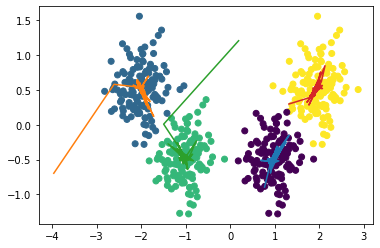

In [7]:
np_trajectories = np.transpose(np.array(trajectories), (1,0,2))
plt.plot(*np_trajectories)
plt.scatter(*DATA, c=minimum)
plt.show()

Text(0.5, 0, 'update ordinal number')

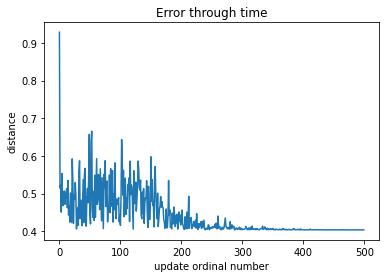

In [8]:
plt.plot(np.arange(0, len(error_hist)), error_hist)
plt.title("Error through time")
plt.ylabel("distance")
plt.xlabel("update ordinal number")

*   The convergence is much faster with smaller learning step, but it is more resilient with a bigger one and the plot above looks more informative. Slow annealing by a factor of $0.99$ was used.

*   Error is not monotonic. Noisyness helps in resilience of the algorithm, avoiding local minima, which correspond to different clustering.